<img src="https://fcytvirtual.uader.edu.ar/pluginfile.php/1/theme_klass/logo/1683584239/miuader.PNG" alt="UADER | FCyT" />

# Diplomatura en Ciencias de Datos Aplicada

## Trabajo final | Septiembre 2023

**En este notebook se presenta el enunciado del trabajo final que los distintos grupos deberán desarrollar. A su vez, se introduce también un ejemplo que pueden utilizar para tomar como base en la estructura de sus trabajos.**



### RECUERDEN HACER UNA COPIA DEL COLAB ANTES DE EMPEZAR A TRABAJAR

# Enunciado

### Análisis de los datos
Seleccionar un conjunto de datos que sea de su interés y tenga al menos 6 variables. Una de ellas deberá ser el "target" del problema en cuestión.

A partir de la elección del conjunto de datos se debe realizar un análisis exploratorio donde se detallen al menos las siguientes cuestiones:

*   Cantidad y tipo de variables de entrada disponibles
*   Cantidad de valores nulos para cada variable
*   Tipo, cantidad de valores nulos y distribución de la variable de salida
*   Análisis de correlación
*   Visualizaciones que ayuden a entender si existe o no alguna relación entre una o más variables de entrada y la variable de salida


### Modelado

Detallar explícitamente cual será la métrica o las métricas que se utilizarán para comparar el desempeño de distintos modelos. Describir también cuál será el método utilizado para asegurar el rendimiento de los mismos (k-fold cross validation, train/test split, etc.). Justifique.

Realizar las transformaciones de datos pertinentes y entrenar al menos 3 modelos diferentes. Comparar los resultados entre ellos y concluir sobre cuál sería el mejor modelo a utilizar. Justifique su elección.



---



# Ejemplo: Prediciendo el precio de viviendas

Con 79 variables explicativas que describen (casi) todos los aspectos de las viviendas residenciales en Ames, Iowa, este conjunto de datos permite predecir el precio final de cada vivienda.



#### Imports y configuraciones generales

In [ ]:
import os

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

from scipy import stats
from scipy.stats import norm, skew

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))
pd.set_option('display.max_columns', 500)

#### Descarga y procesamiento inicial de los datos

In [ ]:
if not os.path.exists("/UADER_DiploDatos_TF/"):
    os.makedirs("/UADER_DiploDatos_TF/")
os.chdir("/UADER_DiploDatos_TF/")

In [ ]:
!wget --quiet --no-clobber https://www.dropbox.com/scl/fi/fb8ewlrdk4nos5jhv9k45/train.csv?rlkey=56upxmtx7qq4ujhp1b8eer0xp&dl=1
!wget --quiet --no-clobber https://www.dropbox.com/scl/fi/illh6aamlj41c2zdo9oi5/test.csv?rlkey=1rgvvjc5j93wt87dk5vjqt4dq&dl=1

In [ ]:
train = pd.read_csv('train.csv?rlkey=56upxmtx7qq4ujhp1b8eer0xp')
y_train = train.SalePrice.values
test = pd.read_csv('test.csv?rlkey=1rgvvjc5j93wt87dk5vjqt4dq')
all_data = pd.concat([train, test])

### Exploración inicial de los datos

In [ ]:
all_data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706.000,Unf,0.000,150.000,856.000,GasA,Ex,Y,SBrkr,856,854,0,1710,1.000,0.000,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2.000,548.000,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.000
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.000,Unf,0.000,284.000,1262.000,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.000,1.000,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2.000,460.000,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.000
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.000,Unf,0.000,434.000,920.000,GasA,Ex,Y,SBrkr,920,866,0,1786,1.000,0.000,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2.000,608.000,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.000
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216.000,Unf,0.000,540.000,756.000,GasA,Gd,Y,SBrkr,961,756,0,1717,1.000,0.000,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3.000,642.000,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655.000,Unf,0.000,490.000,1145.000,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.000,0.000,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3.000,836.000,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.000


In [ ]:
print("Cantidad de filas y columnas del conjunto de datos: ", all_data.shape)

Cantidad de filas y columnas del conjunto de datos:  (2919, 81)


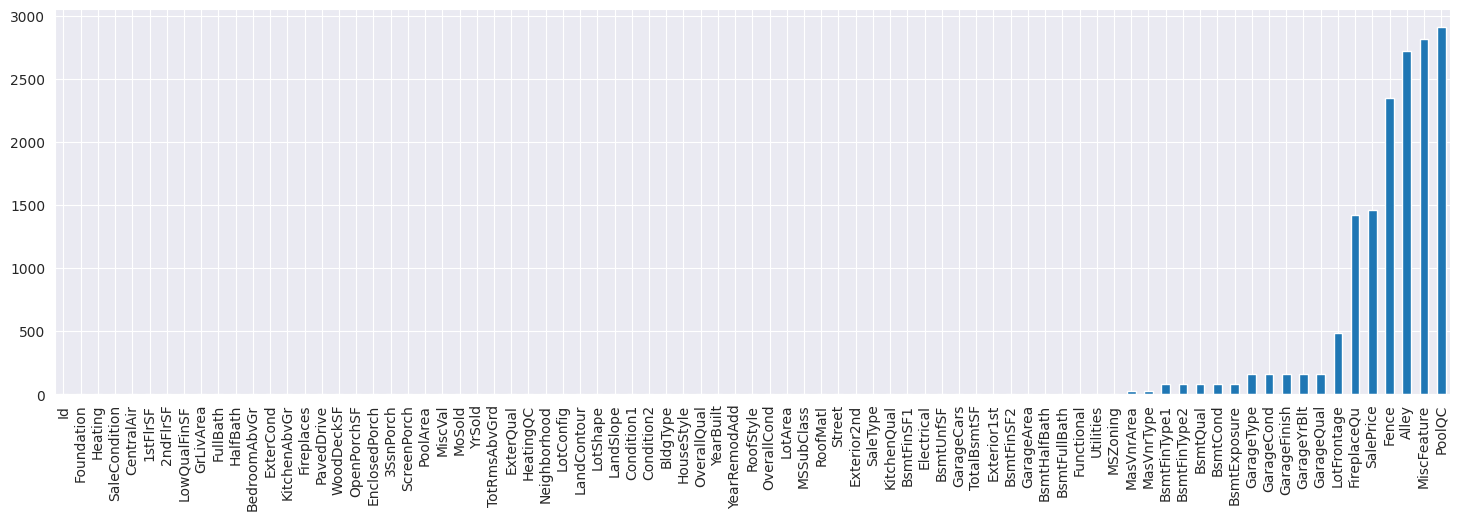

In [ ]:
all_data.isnull().sum().sort_values().plot.bar(figsize=(18, 5));

#Análisis de outliers

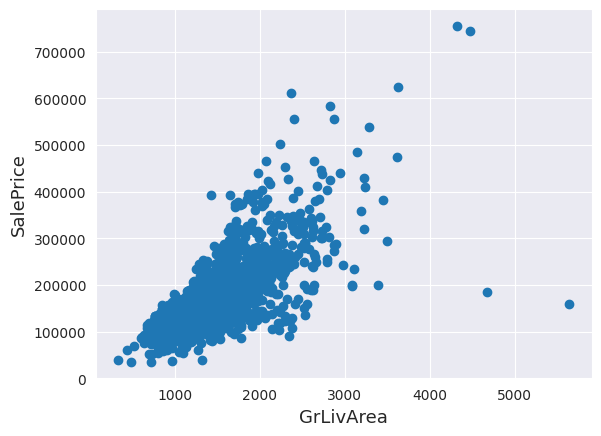

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = all_data['GrLivArea'], y = all_data['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

Podemos ver en la parte inferior derecha dos con GrLivArea extremadamente grande y de bajo precio. Estos valores son outliers.

##Variable de salida

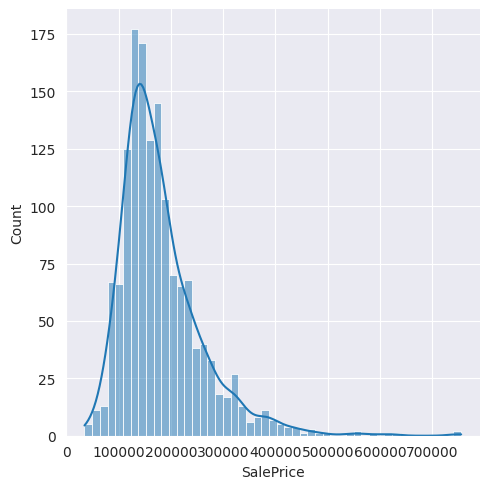

In [ ]:
sns.displot(train, x='SalePrice', kde=True);

### Análisis entre la variable de salida y algunas variables de entrada

#### Calidad de la construcción

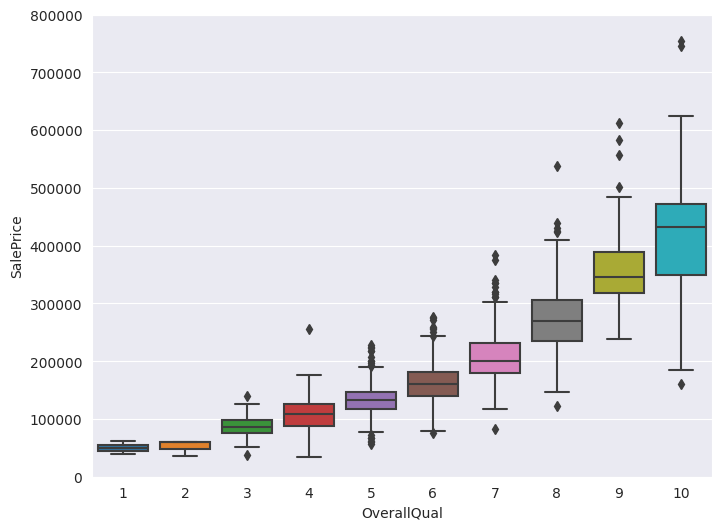

In [ ]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

#### Año de la construcción

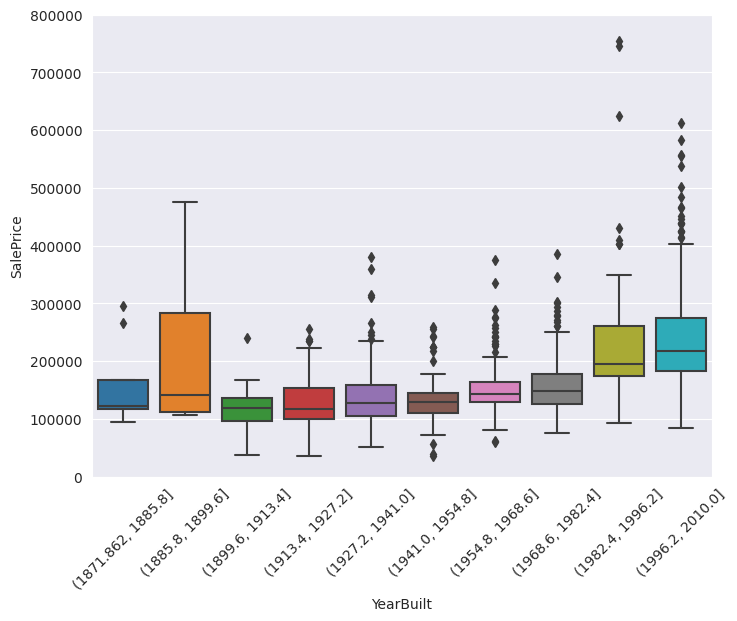

In [ ]:
binned_values = pd.cut(train['YearBuilt'].astype(int), 10).to_frame()
binned_values['SalePrice'] = train.SalePrice
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='YearBuilt', y="SalePrice", data=binned_values)
fig.axis(ymin=0, ymax=800000);
fig.set_xticklabels(fig.get_xticklabels(), rotation=45);

###Correlación entre variables

<Axes: >

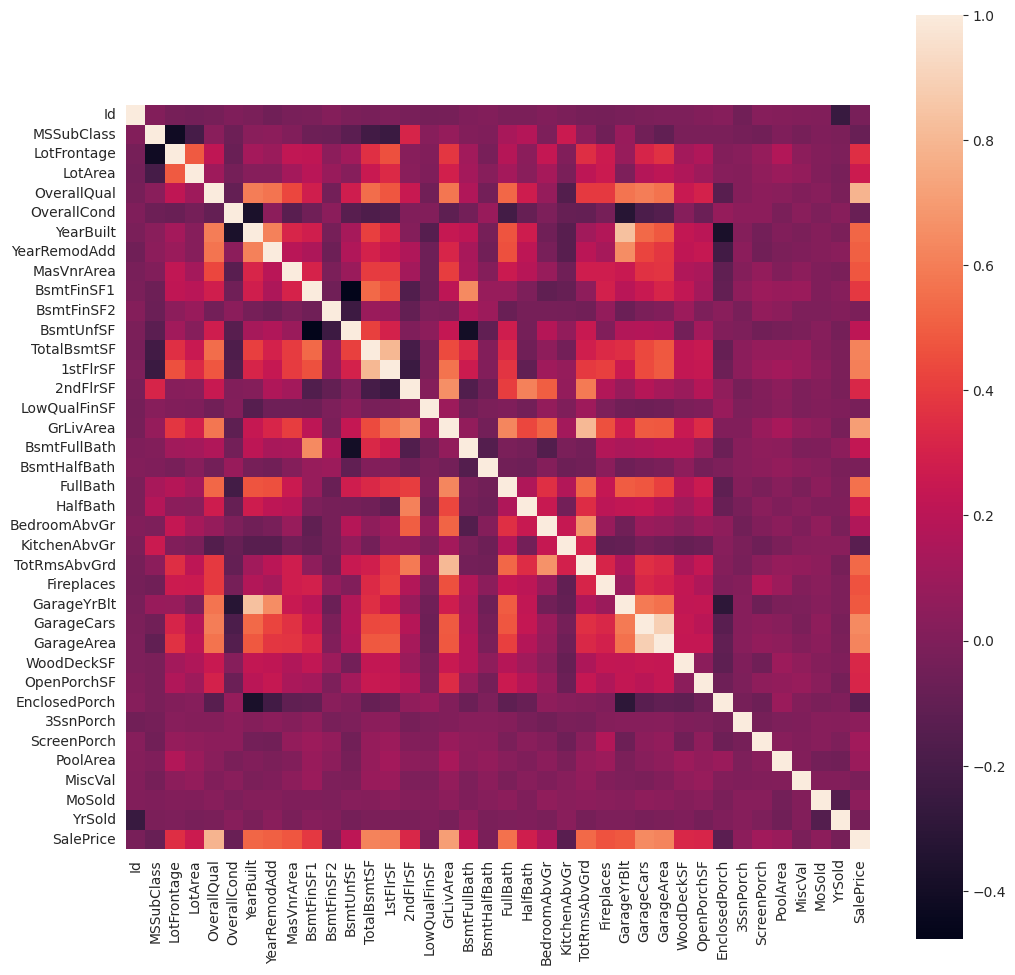

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
corr = all_data.select_dtypes('number').corr()
sns.heatmap(corr, square=True, ax=ax)

###Imputación de valores faltantes

- **PoolQC** : La descripción de los datos dice que NA significa "Sin grupo". Esto tiene sentido, dada la enorme proporción de valores faltantes (+99%), y la mayoría de las casas en general no tienen pileta.

In [ ]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")

- **MiscFeature** : La descripción de los datos dice que NA significa "sin características misceláneas".


In [ ]:
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")

- **Alley** : La descripción de los datos dice que NA significa "sin acceso a callejones".

In [ ]:
all_data["Alley"] = all_data["Alley"].fillna("None")

- **Fence** : La descripción de los datos dice que NA significa "sin cerco".

In [ ]:
all_data["Fence"] = all_data["Fence"].fillna("None")

- **FireplaceQu** : La descripción de los datos dice que NA significa "sin chimenea".

In [ ]:
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

- **LotFrontage** : Dado que el área de cada calle conectada a la propiedad de la casa probablemente tenga un área similar a otras casas en su barrio, podemos completar los valores faltantes con la mediana del frente de lote del barrio.

In [ ]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

- **GarageType, GarageFinish, GarageQual and GarageCond** : Reemplazar datos faltantes con None.

In [ ]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

- **GarageYrBlt, GarageArea and GarageCars** : Reemplazar los datos faltantes con 0 (ya que Sin garage = no hay automóviles en dicho garage).

In [ ]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

- **BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath** : los valores faltantes probablemente sean cero por no tener sótano.

In [ ]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

- **BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2** : Para todas estas características categóricas relacionadas con el sótano, NA significa que no hay sótano.


In [ ]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

- **MasVnrArea and MasVnrType** : Lo más probable es que NA signifique que estas casas no tienen revestimiento de mampostería. Podemos completar 0 para el área y None para el tipo.

In [ ]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

- **MSZoning (The general zoning classification)** :  'RL' es el valor más común. Podemos completar los valores faltantes con 'RL'.


In [ ]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

- **Utilities** : Para esta variable categórica, todos los registros son "AllPub", excepto uno "NoSeWa" y 2 NA. Dado que la casa con 'NoSewa' está en el conjunto de entrenamiento, esta característica no ayudará en el modelado predictivo. Se puede eliminar de forma segura.

In [ ]:
all_data = all_data.drop(['Utilities'], axis=1)

- **Functional** : la descripción de los datos dice NA significa típico.

In [ ]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")

- **Electrical** : Tiene un solo valor NA. Dado que esta característica tiene principalmente 'SBrkr', podemos usarlo para completar el valor faltante.

In [ ]:
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

- **KitchenQual**: Solo un valor NA, y al igual que Eléctrico, usamos 'TA' (que es el más frecuente) para el valor faltante.


In [ ]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

- **Exterior1st and Exterior2nd** : Nuevamente, solo falta un valor. Simplemente sustituiremos con el valor más común.


In [ ]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

- **SaleType** : Complete nuevamente con el más frecuente, que es "WD".

In [ ]:
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

- **MSSubClass** : Lo más probable es que NA significa Sin clase de construcción. Podemos reemplazar los valores faltantes con None.


In [ ]:
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

Hay más valores nulos?

In [ ]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio
SalePrice,49.983


La variable a predecir tiene como valores faltantes los correspondientes al conjunto de test.


###Algunas trasnformaciones sobre los datos

**Variables numéricas que son categóricas en realidad**

In [ ]:
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)

all_data['OverallCond'] = all_data['OverallCond'].astype(str)

all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

**Aplicamos Label Encoding a algunas variables categóricas ordinales**

In [ ]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond',
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1',
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond',
        'YrSold', 'MoSold')

for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(all_data[c].values))
    all_data[c] = lbl.transform(list(all_data[c].values))

print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2919, 80)


**Calculamos una nueva variable en base a los datos disponibles, la cual se conoce que es importante para este tipo de problemas**

Dado que las características relacionadas con el área son muy importantes para determinar los precios de las casas, agregamos una característica más que es el área total incluyendo sótano, primer y segundo piso de cada casa.

In [ ]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

**Se aplica one hot encoding**

In [ ]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2919, 223)


Getting the new train and test sets.

In [ ]:
train = all_data[all_data.SalePrice.notnull()]
test = all_data[all_data.SalePrice.isnull()]


#Modelado

In [ ]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

**Se utiliza una estrategia de validación cruzada**

Usamos la función **cross_val_score** de Sklearn. Sin embargo, esta función no tiene un atributo de ordenamiento aleatoria, por lo que agregamos una línea de código para mezclar el conjunto de datos antes de la validación cruzada.

La métrica a utilizar será neg_mean_squared_error debido a que permite verificar el grado de error del modelo con cada valor numérico esperado.

In [ ]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

##Modelos base

-  **LASSO  Regression**  :

In [ ]:
lasso = Lasso(alpha =0.0005, random_state=1)

- **Elastic Net Regression** :

In [ ]:
ENet = ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3)

- **Kernel Ridge Regression** :

In [ ]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

- **Gradient Boosting Regression** :

In [ ]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10,
                                   loss='huber', random_state =5)

- **XGBoost** :

In [ ]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468,
                             learning_rate=0.05, max_depth=3,
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)



- **LightGBM** :

In [ ]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

###Se verifican los resultados obtenidos por cada método

In [ ]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 75.3810 (13.8328)



In [ ]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 36.7039 (6.0316)



In [ ]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


Kernel Ridge score: 229.4371 (262.0050)



In [ ]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 18865.8535 (4092.3133)



In [ ]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[12:37:12] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[12:37:21] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[12:37:32] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[12:37:41] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[12:37:51] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

Xgboost score: 7770.3316 (1374.2476)



In [ ]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319

###Entrenamiento y predicción sobre el conjunto de test

**XGBoost:**

In [ ]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))

[12:38:00] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



<ipython-input-52-d16ff03e07db>:3: RuntimeWarning: overflow encountered in expm1
  xgb_pred = np.expm1(model_xgb.predict(test))


En este ejemplo no se dispone de las etiquetas reales para los datos de test, pero en caso de disponibles se deberá realizar una medición final sobre estos datos con el método seleccionado.

# Resultados

# Entregable

Deberán enviar al correo diplo.cienciadedatos@uader.edu.ar con el Colab completo con el código funcionando. Además, deberán incluir, un pequeño informe en pdf (El pdf puede ser la impresión del colab con código y texto que hayan ido comentando en cada paso) donde muestren: a qué llegaron, que vieron en el análisis exploratorio? qué decisiones tomaron en el preprocesamiento de datos? Además de un analisis final de los resultados: explicar qué funcionó mejor ese modelo? porqué creen que paso eso? Comenten todo lo que crean necesario.